# WeatherPy
----

### Analysis

* The first chart showing Latitude vs Max Temperature shows a greater distribution of maximum temperatures towards the equator. This makes sense as this is naturally the warmest part of the earth. Regardless of axis tilt and distance from the sun, the equator is reliably warm. The greater distribution of land with cooler temperatures greater than latitude 40 is due the amount of landmass in the Northern hemisphere.

* Just over 52% of the cities queried currently have a humidity rating over 80%. This could be due to the change of seasons as we move from Winter to Spring in the Northern hemisphere and from Summer to Fall in the Southern hemisphere. Two data variations from Peru populate the chart in excess of 100%. In testing Peru provided the only cities variations outside of 100%, yet not every city from Peru reported the variation.

* There is no correlation to be made between Latitude and Cloudiness or Wind Speed.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [2]:
## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500) 
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)

lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

628

In [4]:
### Perform API Calls

In [5]:
url = "http://api.openweathermap.org/data/2.5/weather?"
city = "London"
units = "imperial"

# Build query URL
query_url = url + "appid=" + api_key + "&q=" + city + "&units=" + units

In [6]:
#weather_response = requests.get(query_url).json()
lon_list = []
lat_list = []
temp_list = []
city_list = []
humid_list = []
cloud_list = []
windsp_list = []
cntry_list = []
date_list = []
count = 1

for city in cities:   
    print(f"Requesting Record {count} of City Data for: {city}")
    count += 1
    
    time.sleep(1)
    try:
        query_url = url + "appid=" + api_key + "&q=" + city + "&units=" + units
        weather_response = requests.get(query_url).json()
        lat_value = weather_response["coord"]["lat"]  #-> one way to call information and then append
        lat_list.append(lat_value)
        lon_list.append(weather_response["coord"]["lon"])
        temp_list.append(weather_response["main"]["temp_max"])
        city_list.append(weather_response["name"])
        humid_list.append(weather_response["main"]["humidity"])
        cloud_list.append(weather_response["clouds"]["all"])
        windsp_list.append(weather_response["wind"]["speed"])
        cntry_list.append(weather_response["sys"]["country"])
        date_list.append(weather_response["dt"])
    except:
        print("Ooops, you missed a city!" + city)

Requesting Record 1 of City Data for: port alfred
Requesting Record 2 of City Data for: barentsburg
Ooops, you missed a city!barentsburg
Requesting Record 3 of City Data for: cape town
Requesting Record 4 of City Data for: jiangyou
Requesting Record 5 of City Data for: berlevag
Requesting Record 6 of City Data for: albany
Requesting Record 7 of City Data for: clyde river
Requesting Record 8 of City Data for: turan
Requesting Record 9 of City Data for: meulaboh
Requesting Record 10 of City Data for: hobart
Requesting Record 11 of City Data for: kapaa
Requesting Record 12 of City Data for: aasiaat
Requesting Record 13 of City Data for: richards bay
Requesting Record 14 of City Data for: cherskiy
Requesting Record 15 of City Data for: klaksvik
Requesting Record 16 of City Data for: staryy nadym
Requesting Record 17 of City Data for: taolanaro
Ooops, you missed a city!taolanaro
Requesting Record 18 of City Data for: maloy
Requesting Record 19 of City Data for: erzin
Requesting Record 20 of

Requesting Record 156 of City Data for: mount isa
Requesting Record 157 of City Data for: saldanha
Requesting Record 158 of City Data for: puerto ayora
Requesting Record 159 of City Data for: lusambo
Requesting Record 160 of City Data for: onega
Requesting Record 161 of City Data for: maldonado
Requesting Record 162 of City Data for: kushmurun
Ooops, you missed a city!kushmurun
Requesting Record 163 of City Data for: alugan
Requesting Record 164 of City Data for: castle douglas
Requesting Record 165 of City Data for: nizhneyansk
Ooops, you missed a city!nizhneyansk
Requesting Record 166 of City Data for: linhai
Requesting Record 167 of City Data for: carnarvon
Requesting Record 168 of City Data for: katherine
Requesting Record 169 of City Data for: ketchikan
Requesting Record 170 of City Data for: masterton
Requesting Record 171 of City Data for: katsuura
Requesting Record 172 of City Data for: mumford
Requesting Record 173 of City Data for: kavaratti
Requesting Record 174 of City Data

Requesting Record 312 of City Data for: shakhtinsk
Requesting Record 313 of City Data for: kathu
Requesting Record 314 of City Data for: catamarca
Ooops, you missed a city!catamarca
Requesting Record 315 of City Data for: touros
Requesting Record 316 of City Data for: isangel
Requesting Record 317 of City Data for: nhulunbuy
Requesting Record 318 of City Data for: taywarah
Requesting Record 319 of City Data for: paita
Requesting Record 320 of City Data for: ancud
Requesting Record 321 of City Data for: vila franca do campo
Requesting Record 322 of City Data for: bilibino
Requesting Record 323 of City Data for: san quintin
Requesting Record 324 of City Data for: kashi
Ooops, you missed a city!kashi
Requesting Record 325 of City Data for: hami
Requesting Record 326 of City Data for: yining
Requesting Record 327 of City Data for: vestbygda
Ooops, you missed a city!vestbygda
Requesting Record 328 of City Data for: xam nua
Requesting Record 329 of City Data for: sulangan
Requesting Record 3

Requesting Record 470 of City Data for: yunjinghong
Ooops, you missed a city!yunjinghong
Requesting Record 471 of City Data for: sambava
Requesting Record 472 of City Data for: aden
Requesting Record 473 of City Data for: dongsheng
Requesting Record 474 of City Data for: santa vitoria do palmar
Requesting Record 475 of City Data for: sawtell
Requesting Record 476 of City Data for: phan thiet
Requesting Record 477 of City Data for: buraydah
Requesting Record 478 of City Data for: itarema
Requesting Record 479 of City Data for: roma
Requesting Record 480 of City Data for: kieta
Requesting Record 481 of City Data for: hasaki
Requesting Record 482 of City Data for: polovinnoye
Requesting Record 483 of City Data for: jining
Requesting Record 484 of City Data for: port maria
Requesting Record 485 of City Data for: xining
Requesting Record 486 of City Data for: villamontes
Requesting Record 487 of City Data for: dukat
Requesting Record 488 of City Data for: lalomanu
Ooops, you missed a city!l

Ooops, you missed a city!tumannyy
Requesting Record 626 of City Data for: biak
Requesting Record 627 of City Data for: bur gabo
Ooops, you missed a city!bur gabo
Requesting Record 628 of City Data for: shahrud


In [8]:
weather_df = pd.DataFrame({"City": city_list,
                          "Country": cntry_list,
                          "Max Temp": temp_list,
                          "Humidity": humid_list,
                          "Cloudiness": cloud_list,
                          "Wind Speed": windsp_list,
                          "Latitude": lat_list, 
                          "Longitude": lon_list, 
                           "Date": date_list})
weather_df.to_csv("Output_csv/HWcities.csv")
weather_df.head()

,City,Country,Max Temp,Humidity,Cloudiness,Wind Speed,Latitude,Longitude,Date
0,Port Alfred,ZA,64.99,90,8,4.00,-33.59,26.89,1554676612
1,Cape Town,ZA,64.99,93,0,4.70,-33.93,18.42,1554676266
2,Jiangyou,CN,65.28,45,36,8.75,31.78,104.73,1554676756
3,Berlevag,NO,26.60,63,75,9.17,70.86,29.09,1554673800
4,Albany,US,66.20,42,90,4.27,42.65,-73.75,1554676624


In [9]:
weather_df.count()

City          564
Country       564
Max Temp      564
Humidity      564
Cloudiness    564
Wind Speed    564
Latitude      564
Longitude     564
Date          564
dtype: int64

In [10]:
# Set date to mm/dd/yyyy
date = weather_df.loc[:, 'Date']
date = time.strftime('%m/%d/%Y')
print(date)

04/07/2019


In [11]:
### Plotting the Data

#### Latitude vs. Temperature Plot

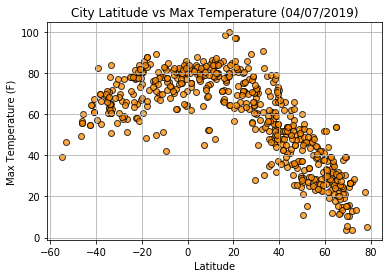

In [12]:
plt.scatter(lat_list, temp_list,  marker="o", facecolors="darkorange", edgecolors="black", alpha=0.75)
plt.title(f"City Latitude vs Max Temperature ({date})")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")

plt.grid()

plt.savefig("Images/latitude_maxtemp.png")

plt.show()

In [13]:
#### Latitude vs. Humidity Plot

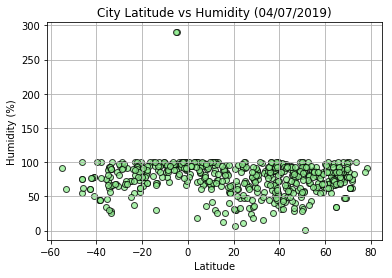

In [14]:
plt.scatter(lat_list, humid_list, marker="o", facecolors="lightgreen", edgecolors="black", alpha=0.75)
plt.title(f"City Latitude vs Humidity ({date})")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

plt.grid(True)

plt.savefig("Images/latitude_humidity.png")

plt.show()

In [15]:
#### Latitude vs. Cloudiness Plot

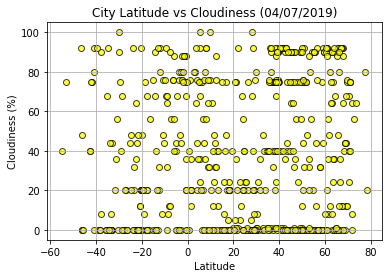

In [16]:
plt.scatter(lat_list, cloud_list, marker="o", facecolors="yellow", edgecolors="black", alpha=0.75)
plt.title(f"City Latitude vs Cloudiness ({date})")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

plt.grid()

plt.savefig("Images/latitude_cloudiness.png")

plt.show()

In [17]:
#### Latitude vs. Wind Speed Plot

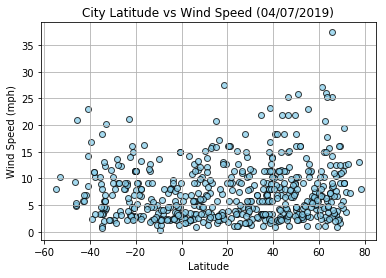

In [18]:
plt.scatter(lat_list, windsp_list, marker="o", facecolors="skyblue", edgecolors="black", alpha=0.75)
plt.title(f"City Latitude vs Wind Speed ({date})")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")

plt.grid()

plt.savefig("Images/latitude_windspeed.png")

plt.show()